In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [2]:


comment = pd.read_csv('./dataset.csv') 
comment["SentimentText"]
comment["SentimentText"] = map(lambda x:BeautifulSoup(x, 'html.parser'),comment["SentimentText"] )




/anaconda3/envs/nlp/lib/python2.7/site-packages/bs4/builder/_htmlparser.py:78: UserWarning: EOF in middle of entity or char ref
  warnings.warn(msg)


In [3]:
comment["SentimentText"] = map(lambda x:x.get_text(),comment["SentimentText"] )

In [4]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/florianbreton/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:


tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(comment["SentimentText"])]



In [6]:
tagged_data


[TaggedDocument(words=[u'first', u'think', u'another', u'disney', u'movie', u',', u'might', u'good', u',', u'it', u"'s", u'kids', u'movie', u'.', u'watch', u'it', u',', u'ca', u"n't", u'help', u'enjoy', u'it', u'.', u'ages', u'love', u'movie', u'.', u'first', u'saw', u'movie', u'10', u'8', u'years', u'later', u'still', u'love', u'it', u'!', u'danny', u'glover', u'superb', u'could', u'play', u'part', u'better', u'.', u'christopher', u'lloyd', u'hilarious', u'perfect', u'part', u'.', u'tony', u'danza', u'believable', u'mel', u'clark', u'.', u'ca', u"n't", u'help', u',', u'enjoy', u'movie', u'!', u'give', u'10/10', u'!'], tags=['0']),
 TaggedDocument(words=[u'put', u'aside', u'dr.', u'house', u'repeat', u'missed', u',', u'desperate', u'housewives', u'(', u'new', u')', u'watch', u'one', u'.', u'do', u"n't", u'know', u'exactly', u'plagued', u'movie', u'.', u'never', u'thought', u'i', u"'d", u'say', u'this', u',', u'want', u'15', u'minutes', u'fame', u'back.script', u',', u'direction', u',',

In [111]:
model = Doc2Vec(tagged_data, epochs=30,vector_size=25, window=9, min_count=3, workers=8,dm=1)


In [112]:
vect = pd.DataFrame(model.docvecs.doctag_syn0)

/anaconda3/envs/nlp/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  """Entry point for launching an IPython kernel.


In [113]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt



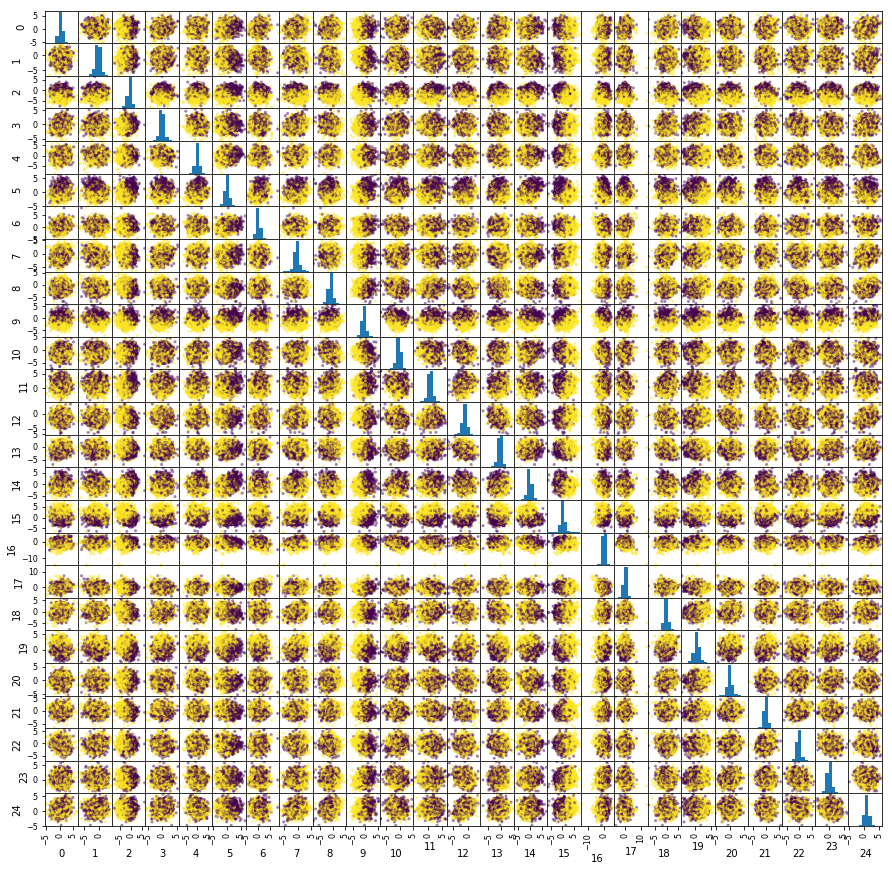

In [114]:
from pandas.plotting import scatter_matrix
sm = scatter_matrix(vect,c=comment["Sentiment"],figsize=(15, 15))

In [115]:
plt.savefig(r"figure_x.png")

<Figure size 432x288 with 0 Axes>

In [116]:
t=vect.to_numpy()

In [117]:
comment["docvec"]= list(map(lambda x: list(vect.iloc[x]), range(25000)))

In [118]:
comment["SentimentText"][2]

u'big fan Stephen King\'s work, film made even greater fan King. Pet Sematary Creed family. moved new house, seem happy. pet cemetery behind house. Creed\'s new neighbor Jud (played Fred Gwyne) explains burial ground behind pet cemetery. burial ground pure evil. Jud tells Louis Creed bury human (or kind pet) burial ground, would come back life. problem, come back, person, they\'re evil. Soon Jud explains everything Pet Sematary, everything starts go hell. wont explain anymore don\'t want give away main parts film. acting Pet Sematary pretty good, needed little bit work. story one main parts movie, mainly original gripping. film features lots make-up effects make movie way eerie, frightening. One basic reasons movie sent chills back, fact make-up effects. one character film truly freaky. character "Zelda." particular character pops film three times precise. Zelda Rachel Creed\'s sister passed away years before, Rachel still haunted her. first time Zelda appears movie isn\'t generally sc

In [119]:
from sklearn import svm
X = list(comment["docvec"])
y = list(comment["Sentiment"])
clf = svm.SVC(kernel="linear")
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=109)

In [148]:
clf = svm.SVC(kernel="rbf")
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [149]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


('Accuracy:', 0.83088)


In [123]:
supp_vec = pd.DataFrame(clf.support_vectors_)

In [110]:
with_sv = pd.concat([vect, supp_vec])
with_sv_color = comment["Sentiment"].append(pd.Series([3 for x in range(len(supp_vec))]))

In [105]:
len(with_sv)

32559

In [106]:
len(with_sv_color)

32559